In [ ]:
!pip install opencv-python matplotlib numpy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

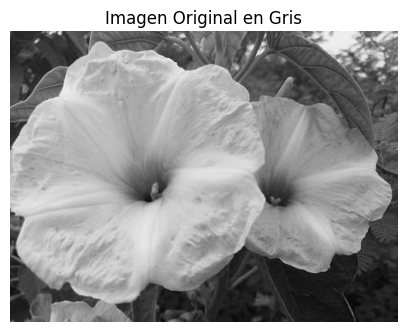

In [3]:
# Cargar la imagen (poner el nombre correspondiente)
# Asegúrate de que la imagen esté en el mismo directorio o usa una ruta válida.

img = cv2.imread('grayscale-image.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.figure(figsize=(5,5))
plt.title('Imagen Original en Gris')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
def aplicar_convolucion(imagen, kernel):
    """Aplica una convolución 2D manual entre una imagen y un kernel"""
    # Obtener dimensiones de la imagen y el kernel
    i_h, i_w = imagen.shape
    k_h, k_w = kernel.shape

    # Calcular los bordes (padding)
    pad_h = k_h // 2
    pad_w = k_w // 2

    # Crear una imagen acolchada para manejar bordes
    imagen_padded = np.pad(imagen, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Crear una imagen de salida
    resultado = np.zeros_like(imagen)

    # Recorrer cada pixel de la imagen
    for y in range(i_h):
        for x in range(i_w):
            # Extraer la región de interés (ROI)
            region = imagen_padded[y:y+k_h, x:x+k_w]
            # Multiplicar y sumar (convolución)
            resultado[y, x] = np.clip(np.sum(region * kernel), 0, 255)

    return resultado


In [5]:
# Sharpening (Enfocar)
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Blur (Suavizado)
kernel_blur = np.ones((3, 3), dtype=np.float32) / 9.0

# Edge Detection (Detección de Bordes tipo Sobel en X)
kernel_edge = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

In [6]:
# Aplicar convoluciones
img_sharpen_manual = aplicar_convolucion(img, kernel_sharpen)
img_blur_manual = aplicar_convolucion(img, kernel_blur)
img_edge_manual = aplicar_convolucion(img, kernel_edge)

In [7]:
#Usando OpenCV (filter2D) para comparación
img_sharpen_cv = cv2.filter2D(img, -1, kernel_sharpen)
img_blur_cv = cv2.filter2D(img, -1, kernel_blur)
img_edge_cv = cv2.filter2D(img, -1, kernel_edge)

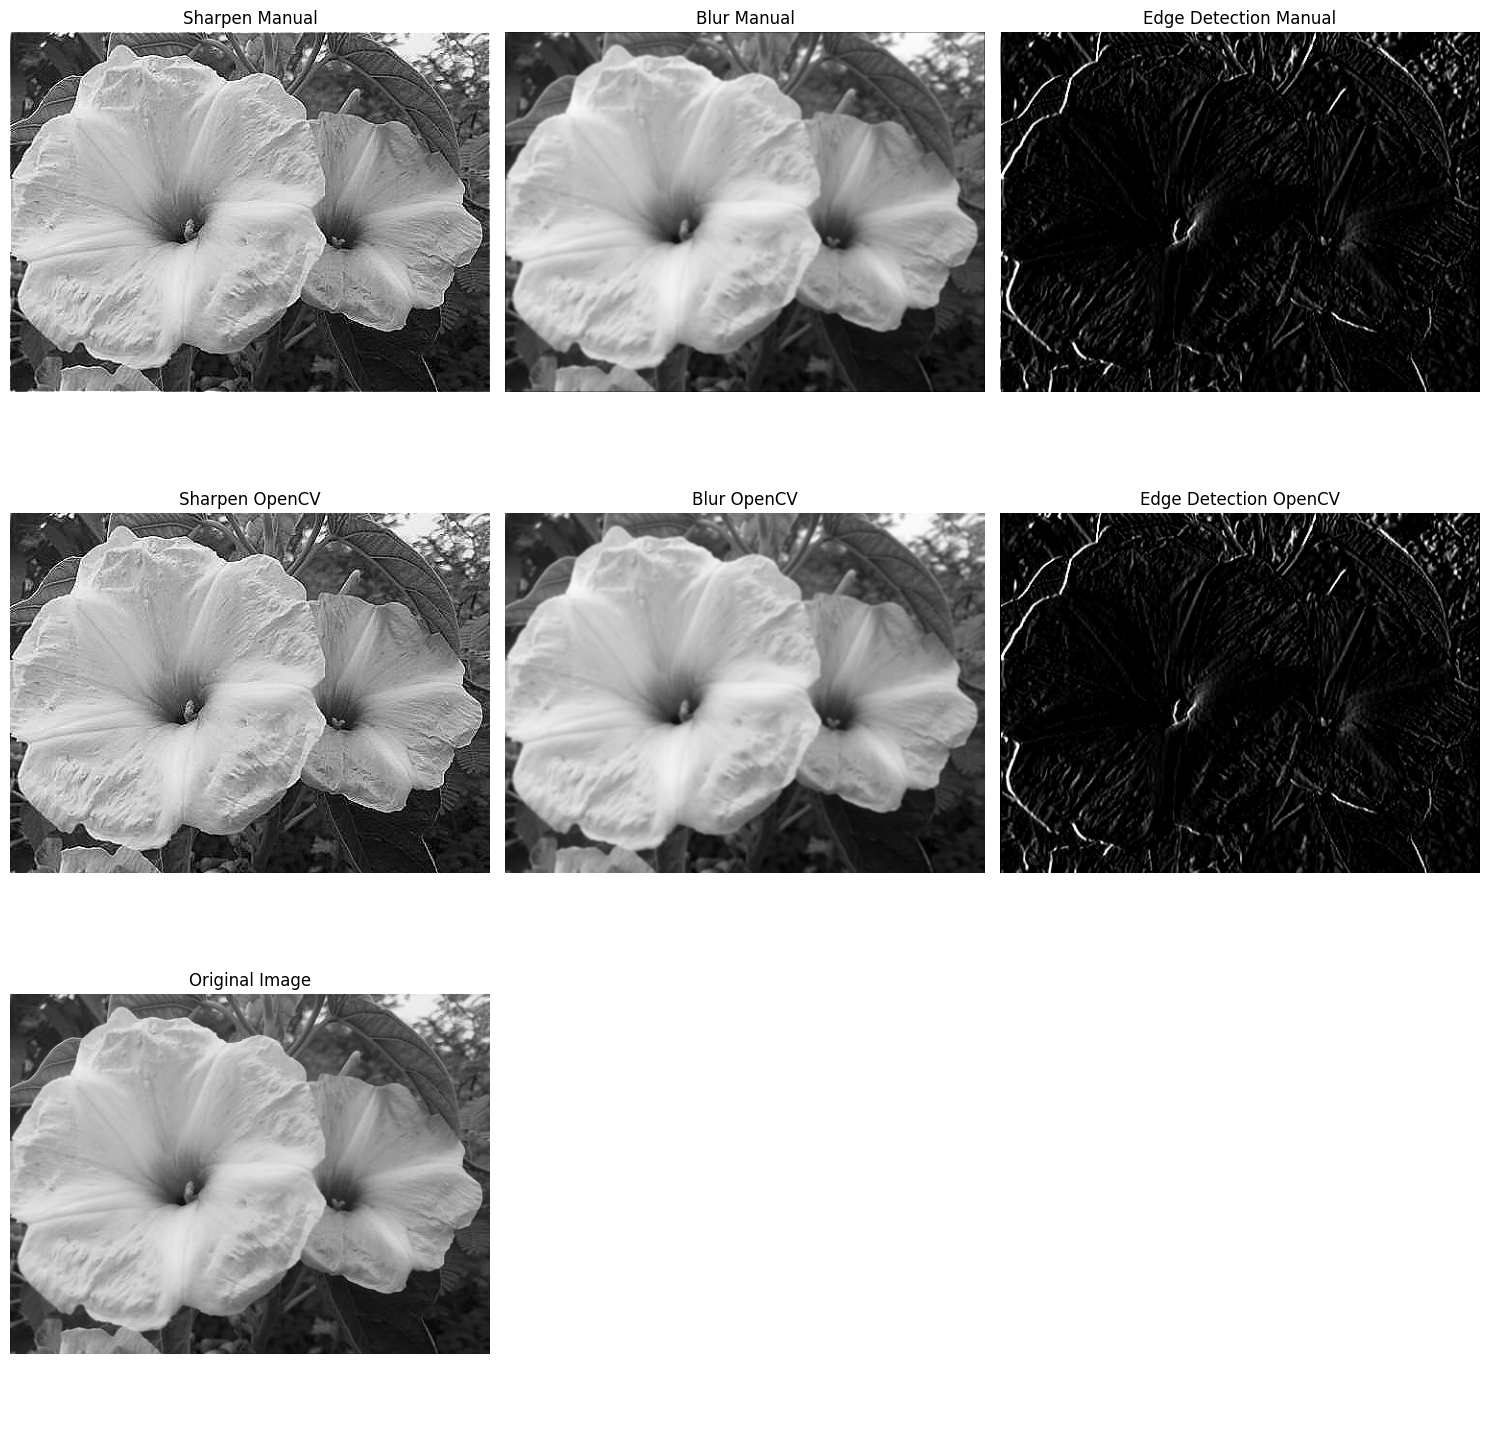

In [8]:
# Mostrar las imágenes lado a lado para comparar
fig, axs = plt.subplots(3, 3, figsize=(15,15))

# Row 1: Manual
axs[0, 0].imshow(img_sharpen_manual, cmap='gray')
axs[0, 0].set_title('Sharpen Manual')
axs[0, 1].imshow(img_blur_manual, cmap='gray')
axs[0, 1].set_title('Blur Manual')
axs[0, 2].imshow(img_edge_manual, cmap='gray')
axs[0, 2].set_title('Edge Detection Manual')

# Row 2: OpenCV
axs[1, 0].imshow(img_sharpen_cv, cmap='gray')
axs[1, 0].set_title('Sharpen OpenCV')
axs[1, 1].imshow(img_blur_cv, cmap='gray')
axs[1, 1].set_title('Blur OpenCV')
axs[1, 2].imshow(img_edge_cv, cmap='gray')
axs[1, 2].set_title('Edge Detection OpenCV')

# Row 3: Original
axs[2, 0].imshow(img, cmap='gray')
axs[2, 0].set_title('Original Image')
axs[2, 1].axis('off')
axs[2, 2].axis('off')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()